# Basic forecasting methods
### Basic forecasting methods work best with mostly or completely random data (no clear seasonality or trend) - e.g. stock or financial data
### 1) Naive method - projects the last observation into the future
### 2) Average method - mean of the data projected into the future
### 3) Drift method - carries the increase between the first and the last observation into the future

### Example

#### a white noise time series - constant mean and variance, normally distributed, totally random and without any pattern (no autocorrelation)

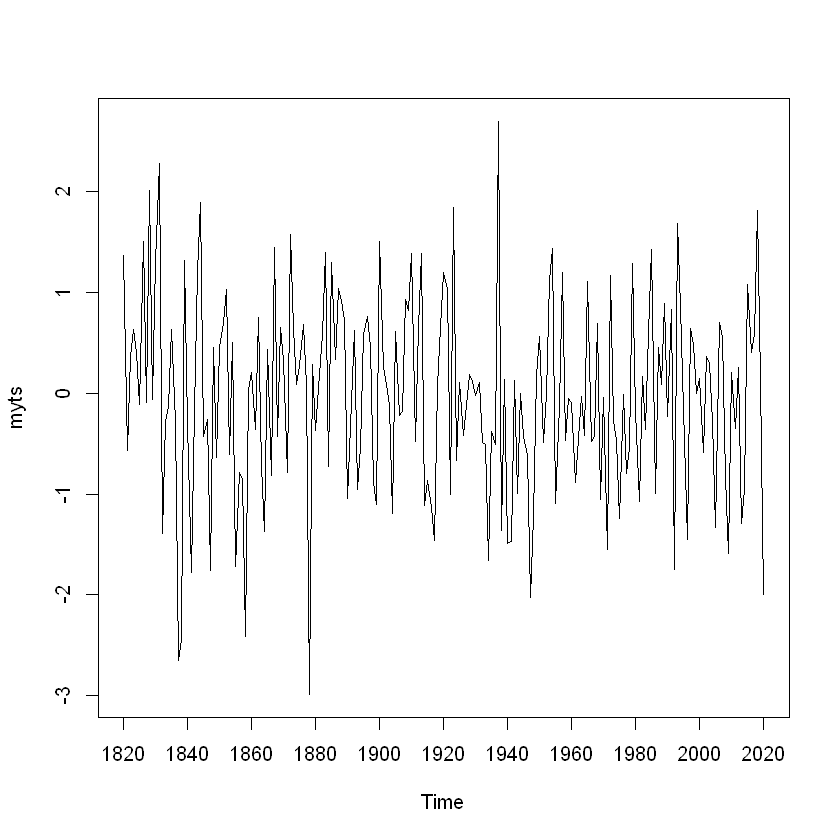

In [252]:
# making a time series with randomly distributed values
set.seed(42)
myts <- ts(rnorm(201), start = (1820))
plot(myts, xaxt='n')
axis(side = 1, at = seq(1820, 2020, 20))

In [253]:
# forecasting 40 years with the three basic methods
library(forecast)
naivem <- naive(myts, h=40) # naive method
meanm <- meanf(myts, h=40) # average method
driftm <- rwf(myts, h=40, drift = T) # drift method

In [254]:
class(naivem)
naivem

[1] "forecast"

     Point Forecast      Lo 80      Hi 80      Lo 95      Hi 95
2021      -2.000929  -3.774969 -0.2268899  -4.714088  0.7122299
2022      -2.000929  -4.509800  0.5079413  -5.837916  1.8360572
2023      -2.000929  -5.073656  1.0717971  -6.700259  2.6984002
2024      -2.000929  -5.549008  1.5471495  -7.427247  3.4253890
2025      -2.000929  -5.967802  1.9659434  -8.067737  4.0658790
2026      -2.000929  -6.346421  2.3445620  -8.646785  4.6449262
2027      -2.000929  -6.694596  2.6927378  -9.179274  5.1774150
2028      -2.000929  -7.018670  3.0168119  -9.674902  5.6730436
2029      -2.000929  -7.323047  3.3211889 -10.140407  6.1385481
2030      -2.000929  -7.610934  3.6090759 -10.580692  6.5788332
2031      -2.000929  -7.884752  3.8828938 -10.999460  6.9976015
2032      -2.000929  -8.146382  4.1445235 -11.399588  7.3977296
2033      -2.000929  -8.397319  4.3954607 -11.783364  7.7815051
2034      -2.000929  -8.638777  4.6369183 -12.152641  8.1507826
2035      -2.000929  -8.871754  4.869895

In [255]:
class(meanm)
meanm

[1] "forecast"

     Point Forecast     Lo 80    Hi 80     Lo 95   Hi 95
2021    -0.03730258 -1.303172 1.228567 -1.978635 1.90403
2022    -0.03730258 -1.303172 1.228567 -1.978635 1.90403
2023    -0.03730258 -1.303172 1.228567 -1.978635 1.90403
2024    -0.03730258 -1.303172 1.228567 -1.978635 1.90403
2025    -0.03730258 -1.303172 1.228567 -1.978635 1.90403
2026    -0.03730258 -1.303172 1.228567 -1.978635 1.90403
2027    -0.03730258 -1.303172 1.228567 -1.978635 1.90403
2028    -0.03730258 -1.303172 1.228567 -1.978635 1.90403
2029    -0.03730258 -1.303172 1.228567 -1.978635 1.90403
2030    -0.03730258 -1.303172 1.228567 -1.978635 1.90403
2031    -0.03730258 -1.303172 1.228567 -1.978635 1.90403
2032    -0.03730258 -1.303172 1.228567 -1.978635 1.90403
2033    -0.03730258 -1.303172 1.228567 -1.978635 1.90403
2034    -0.03730258 -1.303172 1.228567 -1.978635 1.90403
2035    -0.03730258 -1.303172 1.228567 -1.978635 1.90403
2036    -0.03730258 -1.303172 1.228567 -1.978635 1.90403
2037    -0.03730258 -1.303172 1

In [256]:
class(driftm)
driftm

[1] "forecast"

     Point Forecast      Lo 80      Hi 80      Lo 95      Hi 95
2021      -2.017789  -3.796148 -0.2394294  -4.737554  0.7019771
2022      -2.034648  -4.555908  0.4866113  -5.890582  1.8212854
2023      -2.051508  -5.147079  1.0440638  -6.785775  2.6827603
2024      -2.068367  -5.651662  1.5149277  -7.548543  3.4118093
2025      -2.085226  -6.101327  1.9308743  -8.227322  4.0568696
2026      -2.102086  -6.512273  2.3081017  -8.846886  4.6427140
2027      -2.118945  -6.894097  2.6562060  -9.421909  5.1840184
2028      -2.135805  -7.253032  2.9814222  -9.961928  5.6903184
2029      -2.152664  -7.593397  3.2880690 -10.473548  6.1682192
2030      -2.169524  -7.918330  3.5792823 -10.961564  6.6225164
2031      -2.186383  -8.230189  3.8574227 -11.429586  7.0568202
2032      -2.203242  -8.530804  4.1243188 -11.880412  7.4739274
2033      -2.220102  -8.821625  4.3814207 -12.316260  7.8760556
2034      -2.236961  -9.103823  4.6299007 -12.738921  8.2649980
2035      -2.253821  -9.378364  4.870722

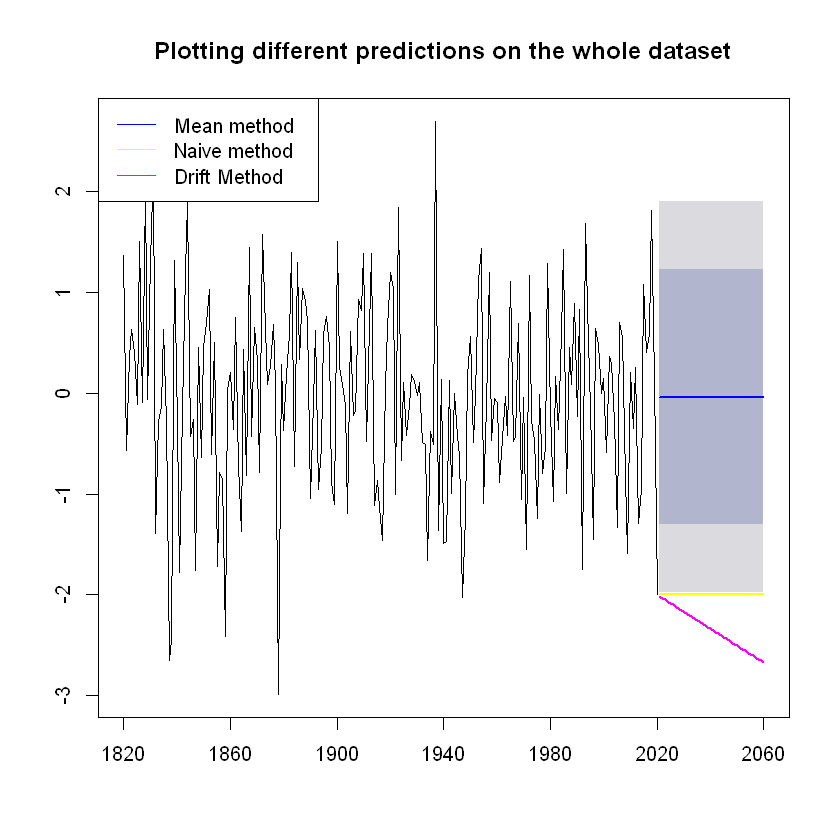

In [257]:
plot(meanm, main = 'Plotting different predictions on the whole dataset', xaxt='n')
axis(side = 1, at = seq(1820, 2060, 40))
lines(naivem$mean, col='yellow', lwd = 2) # col for the color
lines(driftm$mean, col=22, lwd = 2)
legend("topleft", lty=1, col=c(4,'yellow',22), legend=c("Mean method","Naive method","Drift Method"))

# Forecast accuracy
### Forecast accuracy is the difference between the actual value and the forecast for that value.
### 1) MAE - mean absolute error
#### the mean of all differences between actual and forecasted absolute values
### 2) RMSE - root mean squared error / RMSD - root mean squared deviation
#### the sample standard deviation of differences between actual and forecasted values
### 3) MASE - mean absolute scaled error
#### the forecast error compared to the error of a naive forecast - the lower, the better (0 < x < 1)
### 4) MAPE - mean absolute percentage error
#### the difference of forecast errors divided by the actual observation value
#### this one puts more weight on positive errors and extreme values, but is scale-independent
### 5) AIC - Akaike information criterion
#### compares the complexity of different models - the lower, the better

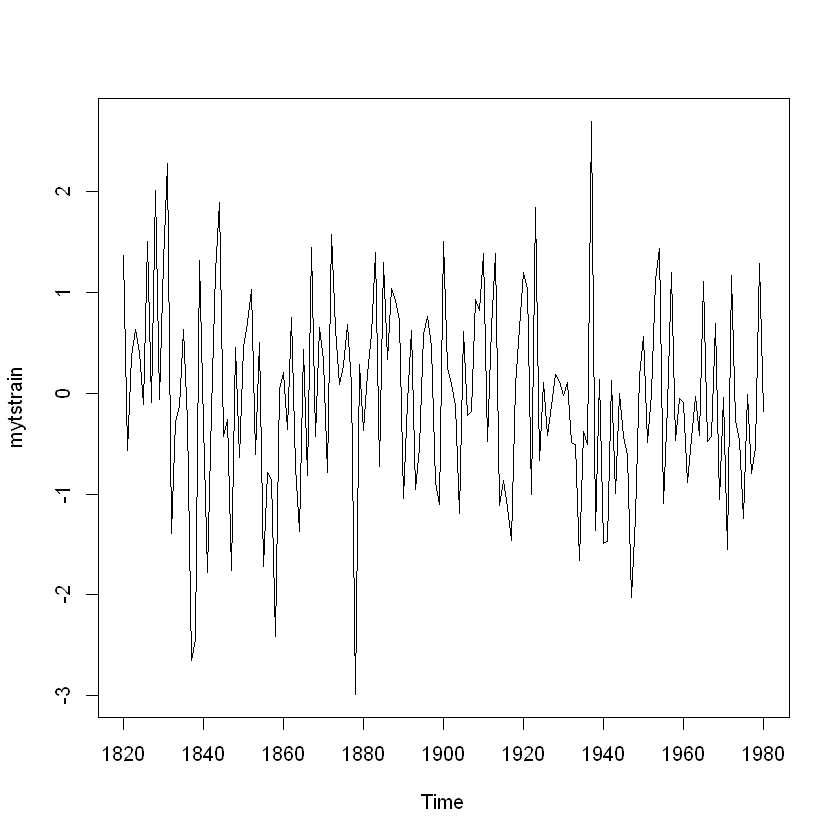

In [258]:
# making the training data set of first 160 observation (of total 201) - approx. 80%, as often recommended
mytstrain <- window(myts, start = 1820, end = 1980)
plot(mytstrain, xaxt='n')
axis(side = 1, at = seq(1820, 1980, 20))

In [259]:
# forecasting 40 years on the training dataset with the three basic methods
naivemtrain <- naive(mytstrain, h=40) # naive method
meanmtrain <- meanf(mytstrain, h=40) # average method
driftmtrain <- rwf(mytstrain, h=40, drift = T) # drift method

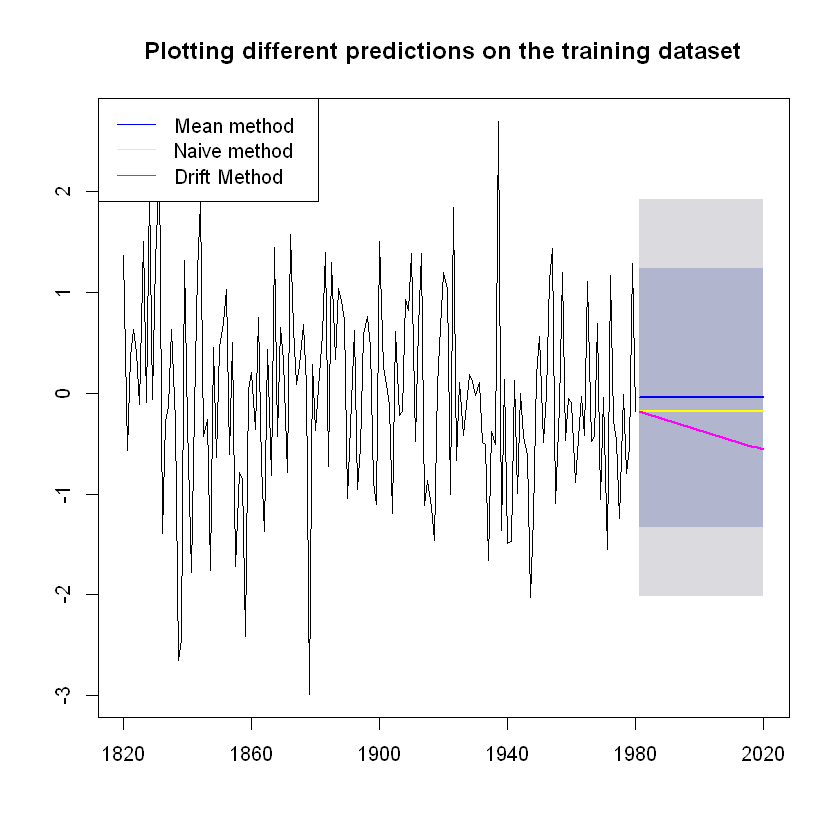

In [260]:
plot(meanmtrain, main = 'Plotting different predictions on the training dataset', xaxt='n')
axis(side = 1, at = seq(1820, 2020, 40))
lines(naivemtrain$mean, col='yellow', lwd = 2) # col for the color
lines(driftmtrain$mean, col=22, lwd = 2)
legend("topleft", lty=1, col=c(4,'yellow',22), legend=c("Mean method","Naive method","Drift Method"))

In [261]:
# making the test data set from the remaining 41 observation
mytstest <- window(myts, start = 1980)

In [262]:
# accuracy of the naive method compared to the test dataset
accuracy(naivemtrain, mytstest)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.009665527,1.3959290,1.1074043,4622.51125,5651.6713,1.0000000,-0.5082852,NA
Test set,0.161712339,0.9384493,0.7841052,47.78718,181.6949,0.7080568,-0.1078775,1.606654


In [263]:
# accuracy of the average method compared to the test dataset
accuracy(meanmtrain, mytstest)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.745793e-17,0.9927675,0.7774672,504.88485,540.2515,0.7020627,0.01122715,NA
Test set,2.932484e-02,0.9248762,0.7563902,87.16784,116.1050,0.6830298,-0.10787750,1.100581


In [264]:
# accuracy of the drift method compared to the test dataset
accuracy(driftmtrain, mytstest)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.222845e-17,1.3958956,1.1076460,4713.791811,5752.153,1.0002182,-0.5082852,NA
Test set,3.598556e-01,0.9896255,0.8460185,-4.140317,284.153,0.7639653,-0.1096529,2.410058


#### We can see from the above that the lowest values on RMSE, MAE, MAPE and MASE were with the average method, and that the other two methods work on this data approximately the same.
#### Another values in the table: ME: Mean Error; MPE: Mean Percentage Error; ACF1: Autocorrelation of errors at lag 1.

# Residuals
#### The remaining data after modeling. We want only randomness in residuals - mean zero, constant variance, no correlation, normal distribution.

In [265]:
# residuals for the average method
mean(meanm$residuals)
var(meanm$residuals)

[1] -1.968178e-17

[1] 0.9644427

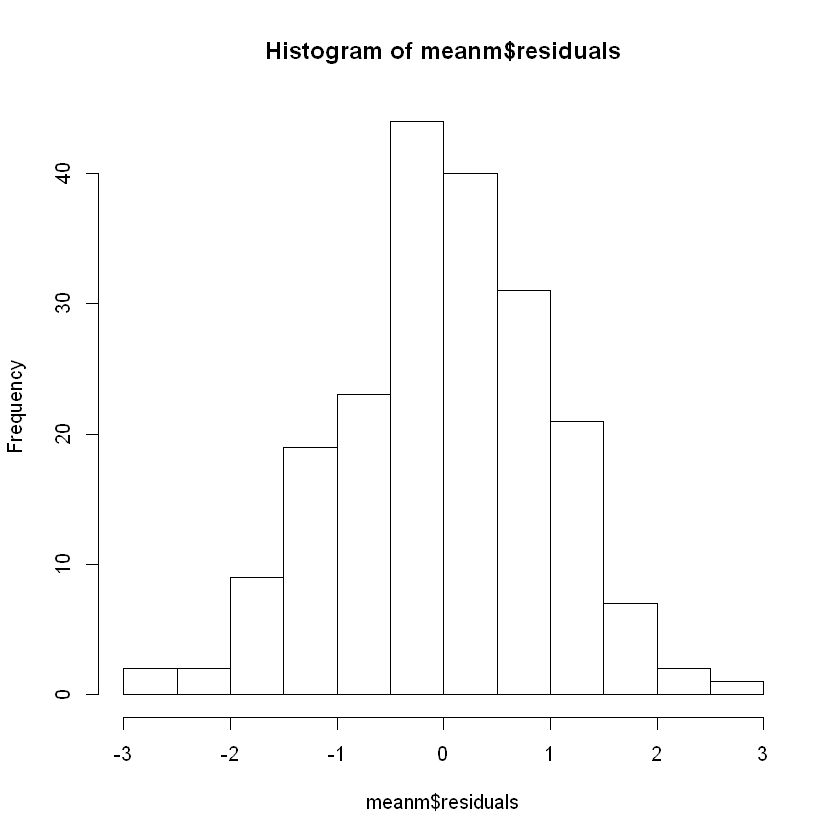

In [270]:
# histogram of residuals for the average method - we want normal distribution
hist(meanm$residuals)

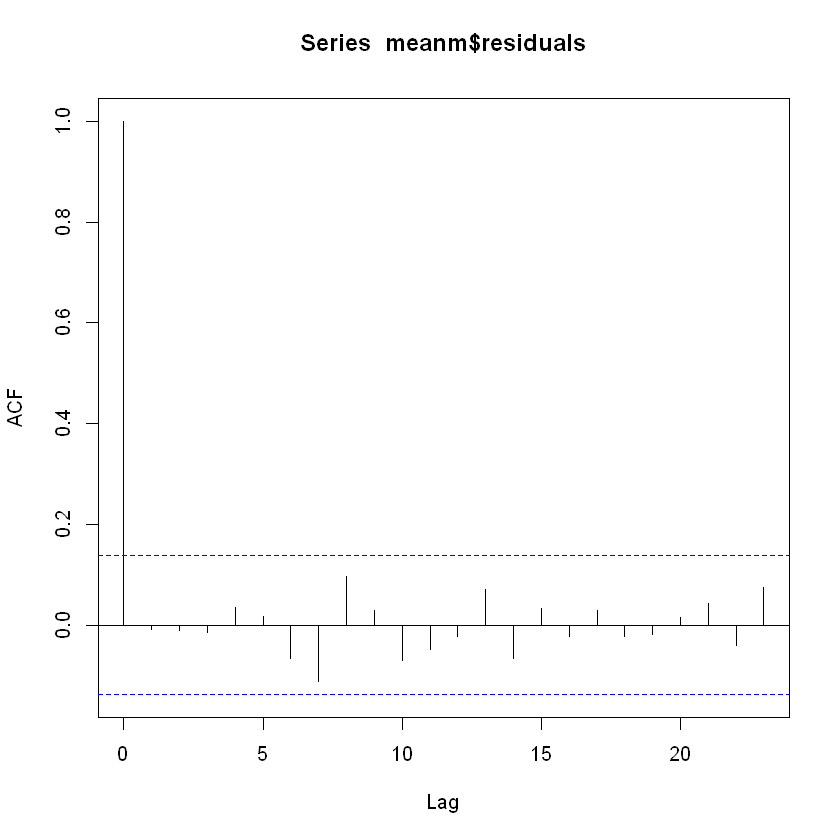

In [279]:
# autocorrelation - we want absence of correlation, as it is on the graph (r(lag0)=1 by default)
acf(meanm$residuals)

#### For naive and drift method need one observation to start with, so the first position variance cannot be computed => it is an N/A.

In [266]:
mean(naivem$residuals)

[1] NA

In [267]:
mean(driftm$residuals)

[1] NA

In [268]:
# residuals for the naive method > result depends on the last value observed
# mean not very close to 0, and variance far from 1
naivwithoutNA <- naivem$residuals
naivwithoutNA <- naivwithoutNA[2:201]
mean(naivwithoutNA)
var(naivwithoutNA)

[1] -0.01685944

[1] 1.925603

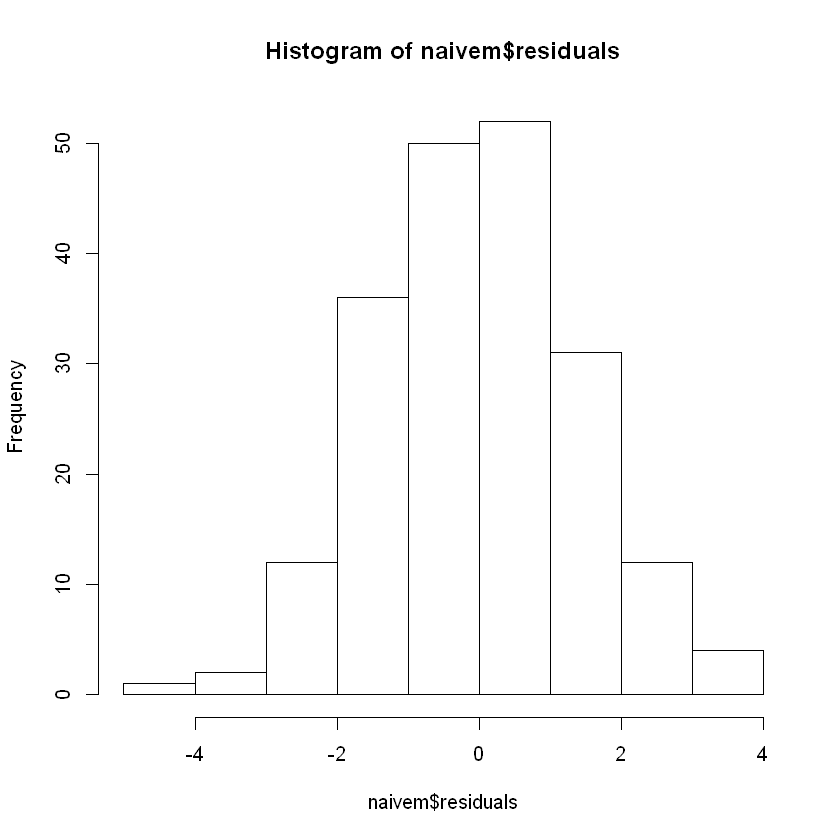

In [275]:
# histogram of residuals for the naive method - we want normal distribution, but we got tails not really equal
hist(naivem$residuals)

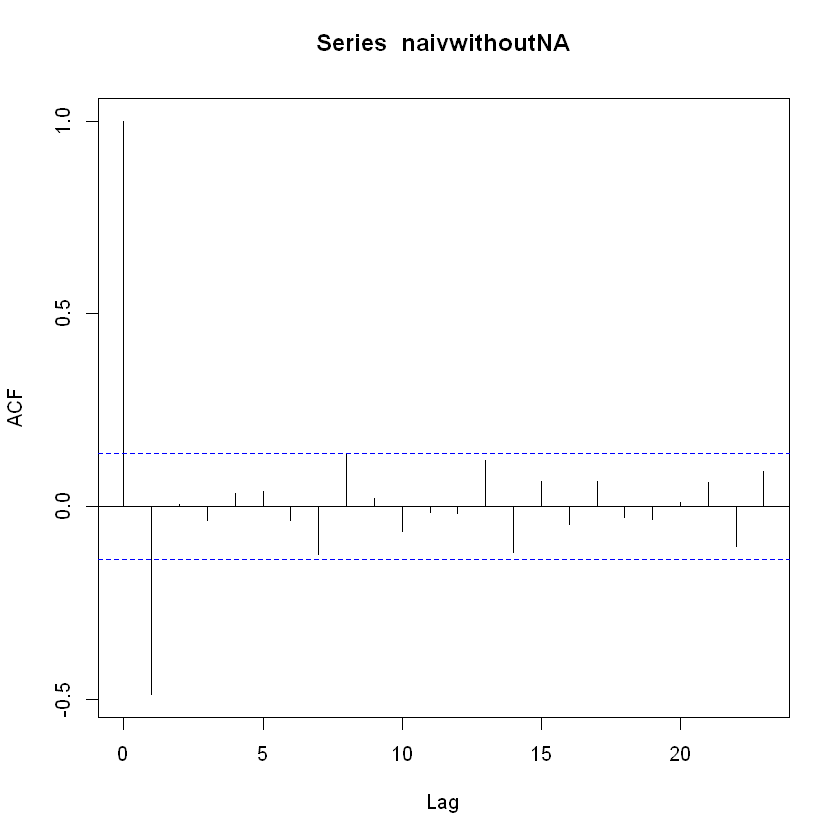

In [276]:
# autocorrelation - we want absence of correlation, and we got one significant correlation corresponding to lag 1
acf(naivwithoutNA)

In [269]:
# residuals for the drift method > the first and the last observed value canceled each other out
# mean somewhat closer to 0, variance also far from 1
driftwithoutNA <- driftm$residuals
driftwithoutNA <- driftwithoutNA[2:201]
mean(driftwithoutNA)
var(driftwithoutNA)

[1] 5.764595e-17

[1] 1.925603

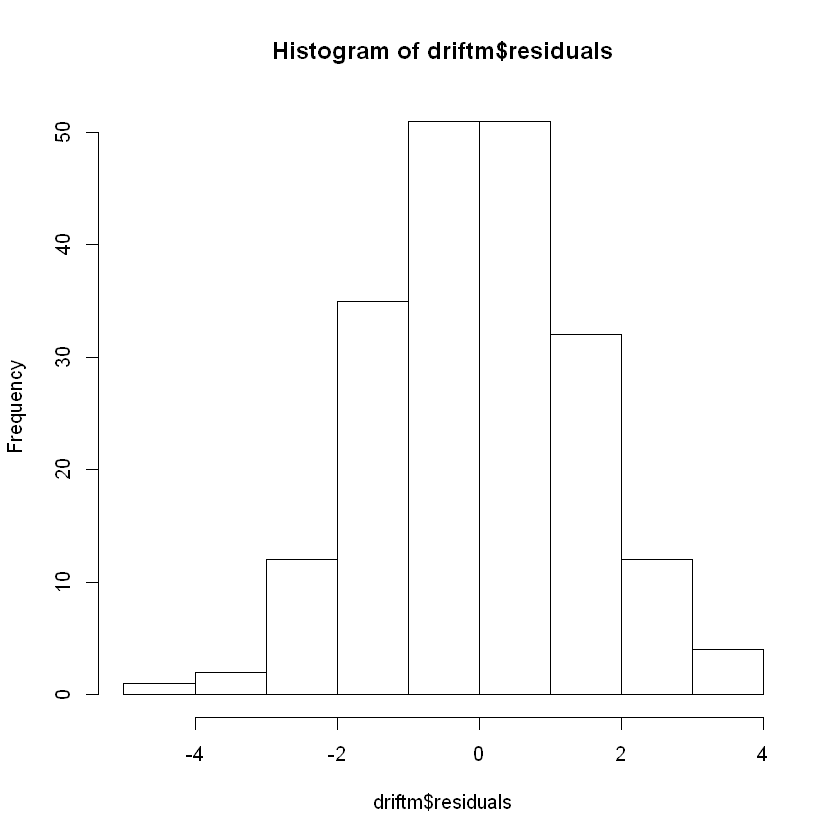

In [277]:
# histogram of residuals for the drift method - we want normal distribution, but we got non-equal tails
hist(driftm$residuals)

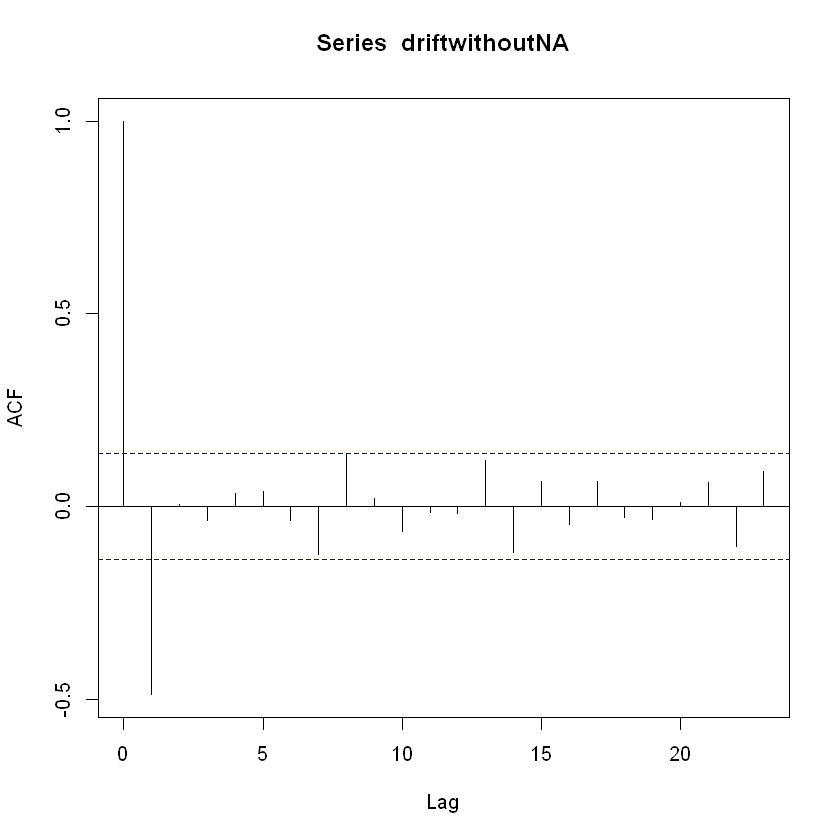

In [278]:
# autocorrelation - we want absence of correlation, and we got a significant correlation corresponding to lag 1
acf(driftwithoutNA)

#### We can see at the end that the average method is the best for this random data, as the error measures are the lowest, residuals are close to normally distributed, and there is the absence of autocorrelation of residuals.

# Stationarity
#### i.e. does the data have the same statistical properties (mean, variance, autocorrelation) along the time series?
#### Most analytical procedures in time series require stationary data > otherwise we need to do some transformations or differencing.

#### Some time series include a trend > mean changes as a result of the trend. They require de-trending:
#### - trend stationarity - taking the trend component out of the data
#### - difference stationarity - using differencing
#### Unit-root tests can tell whether there is a trend stationarity or a difference stationarity in the data. 
#### We can run unit-root tests either with adf.test() from the 'tseries' package, or with some function from 'urca' or 'fUnitRoots' package.

In [297]:
install.packages('tseries')
library(tseries)

Warning message:
"package 'tseries' is in use and will not be installed"

In [299]:
adf.test(myts) # augmented Dickey Fuller Test
# small p-value => we reject the null hypothesis of non-stationarity, therefore, this data is stationary

Warning message in adf.test(myts):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  myts
Dickey-Fuller = -5.8728, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


# Autocorrelation
#### Durbin-Watson test - only first-order correlation, not robust to trends and seasonality
#### acf() - r between different time points (lags) in a time series; identifies the moving average (MA) part of the ARIMA model
#### pacf() - r adjusted for all shorter lags in a time series; identifies the values for the autoregressive (AR) part

In [313]:
length(myts)

[1] 201

In [317]:
# Durbin-Watson test on myts
# we do not reject null hypothesis that there is no autocorrelation in myts - as expected for a random normally distributed data
install.packages('lmtest')
library('lmtest')
dwtest(myts[-201] ~ myts[-1])

Warning message:
"package 'lmtest' is in use and will not be installed"


	Durbin-Watson test

data:  myts[-201] ~ myts[-1]
DW = 1.9869, p-value = 0.4627
alternative hypothesis: true autocorrelation is greater than 0


In [318]:
# Durbin-Watson test on the nottem dataset
# we reject null hypothesis that there is no autocorrelation in the nottem dataset
length(nottem)
dwtest(nottem[-240] ~ nottem[-1])

[1] 240


	Durbin-Watson test

data:  nottem[-240] ~ nottem[-1]
DW = 1.0093, p-value = 5.097e-15
alternative hypothesis: true autocorrelation is greater than 0



Autocorrelations of series 'myts', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.009 -0.011 -0.016  0.035  0.017 -0.066 -0.112  0.096  0.029 -0.070 
    11     12     13     14     15     16     17     18     19     20     21 
-0.048 -0.023  0.070 -0.067  0.032 -0.023  0.029 -0.023 -0.018  0.014  0.043 
    22     23     24     25     26     27     28     29     30     31     32 
-0.041  0.074 -0.002 -0.019  0.030 -0.106  0.046 -0.059 -0.046  0.034 -0.086 
    33     34     35     36     37     38     39     40     41     42     43 
 0.020 -0.004 -0.070  0.024  0.076 -0.092 -0.013  0.041  0.049 -0.031  0.002 
    44     45     46     47     48     49     50     51     52     53     54 
 0.027 -0.003 -0.018 -0.075 -0.019  0.016 -0.077 -0.087  0.001  0.021  0.019 
    55     56     57     58     59     60     61     62     63     64     65 
-0.178  0.077  0.069  0.042 -0.093 -0.030  0.083  0.029 -0.076 -0.029  0.042 
    66     67     68

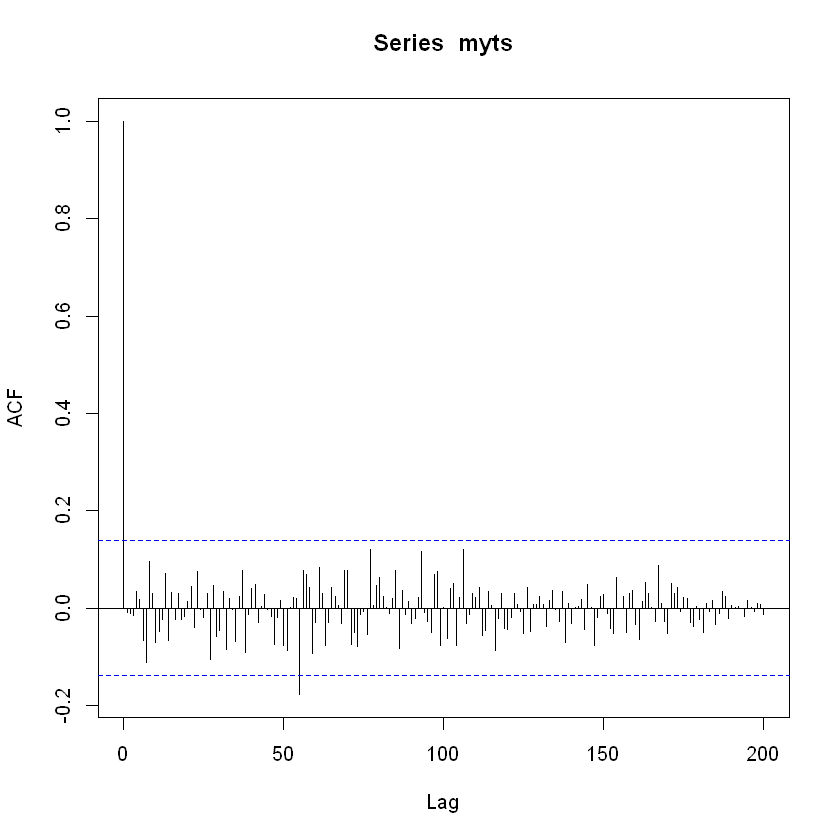

In [326]:
acf(myts, lag.max = 201, plot = F) # lag.max for numbers of lags to be calculated; 'plot = F' to suppress plotting
acf(myts, lag.max = 201)
# lag 55 had a significant negative autocorrelation coefficient (ranging out of the 95% CI)


Partial autocorrelations of series 'myts', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.009 -0.011 -0.016  0.035  0.017 -0.065 -0.113  0.094  0.027 -0.070 -0.038 
    12     13     14     15     16     17     18     19     20     21     22 
-0.030  0.050 -0.067  0.062 -0.031 -0.002 -0.021 -0.006  0.024  0.018 -0.030 
    23     24     25     26     27     28     29     30     31     32     33 
 0.075 -0.004 -0.027  0.031 -0.092  0.034 -0.061 -0.036  0.039 -0.107  0.035 
    34     35     36     37     38     39     40     41     42     43     44 
-0.022 -0.052  0.000  0.084 -0.103 -0.040  0.075  0.011 -0.032  0.016  0.032 
    45     46     47     48     49     50     51     52     53     54     55 
-0.047 -0.033 -0.026 -0.025 -0.027 -0.062 -0.068 -0.022  0.033 -0.024 -0.151 
    56     57     58     59     60     61     62     63     64     65     66 
 0.072  0.022  0.041 -0.100 -0.028  0.053 -0.029 -0.032 -0.022 -0.005 -0.012 
    67     6

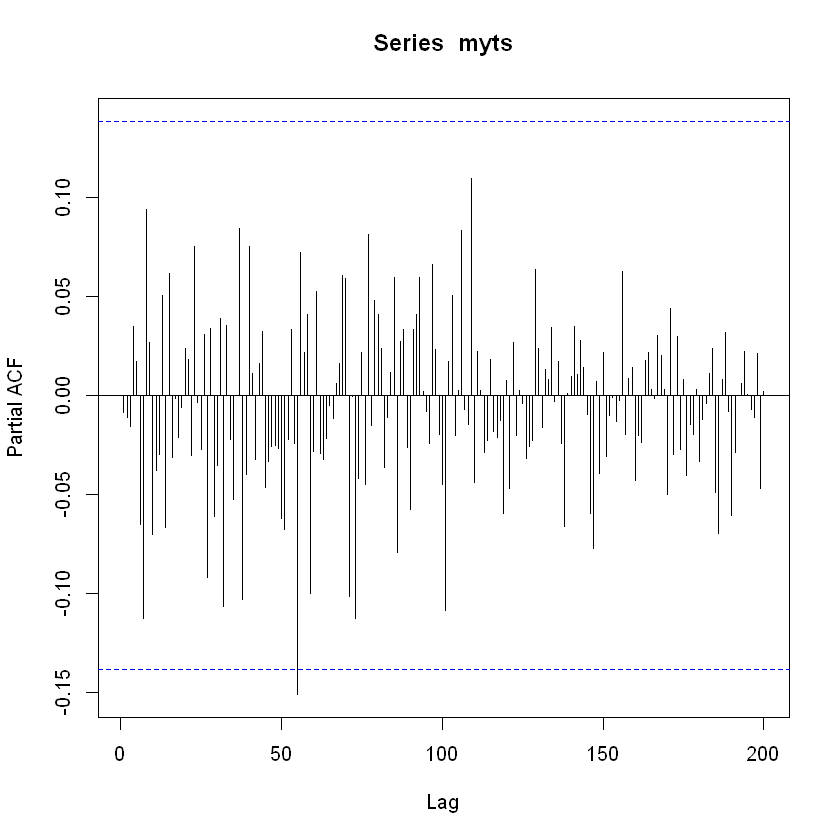

In [327]:
pacf(myts, lag.max = 201, plot = F)
pacf(myts, lag.max = 201)
# lag 55 had a significant negative autocorrelation coefficient (ranging out of the 95% CI)

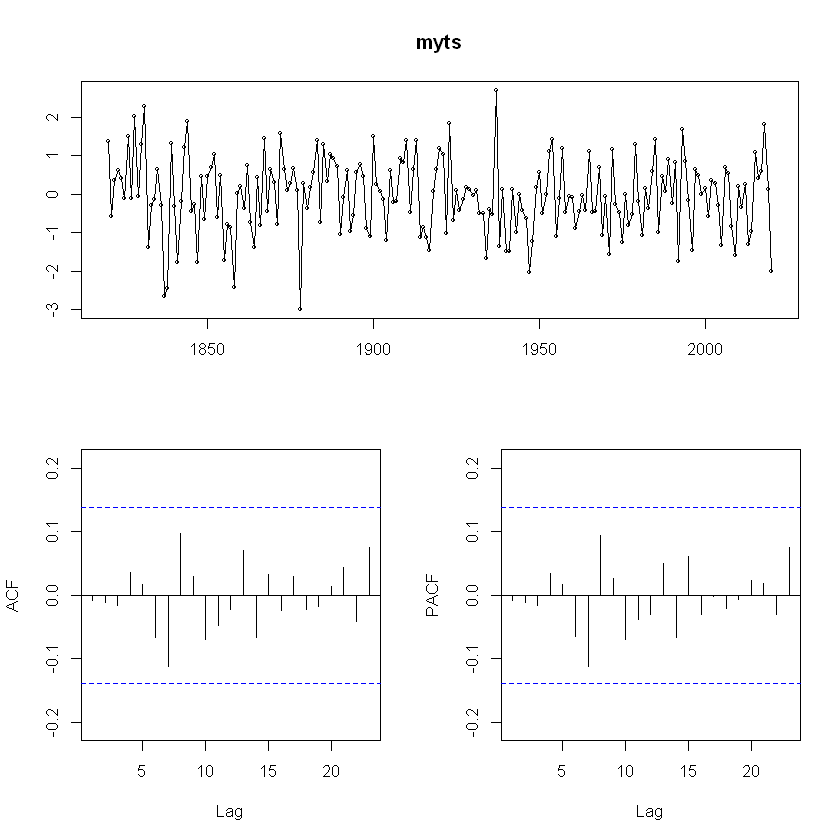

In [330]:
# function of the 'forecast' package that displays ACF and PACF automathically
tsdisplay(myts)